In [1]:
# 라이브러리 세팅
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

K-means clustering

In [2]:
# 데이터 불러오기
iris_df = sns.load_dataset('iris')
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

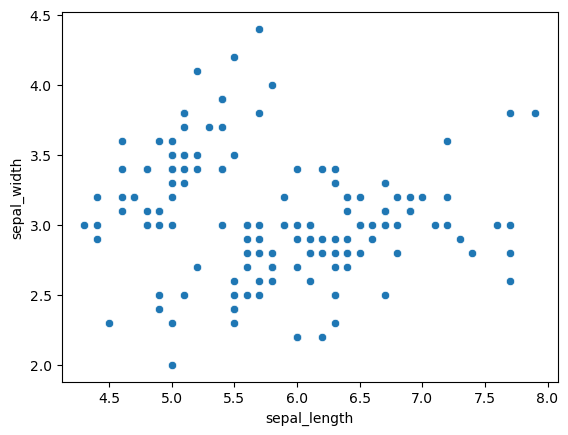

In [4]:
sns.scatterplot(data = iris_df, x = 'sepal_length', y = 'sepal_width')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

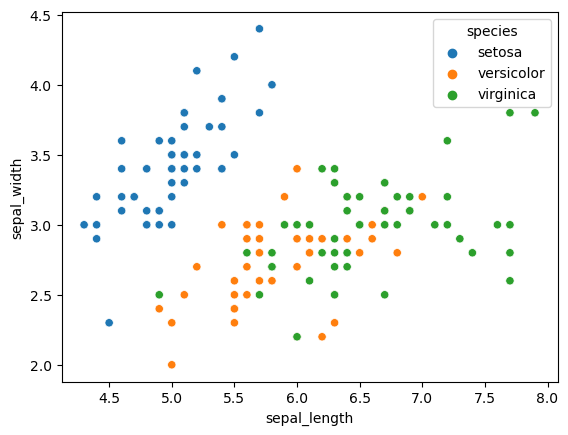

In [5]:
sns.scatterplot(data = iris_df, x = 'sepal_length', y = 'sepal_width', hue = 'species')

In [6]:
iris_df2 = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
iris_df2.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state= 42)
kmeans.fit(iris_df2)

KMeans(n_clusters=3, random_state=42)

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
iris_df2['target'] = iris_df['species']
iris_df2['cluster'] = kmeans.labels_
iris_df2

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


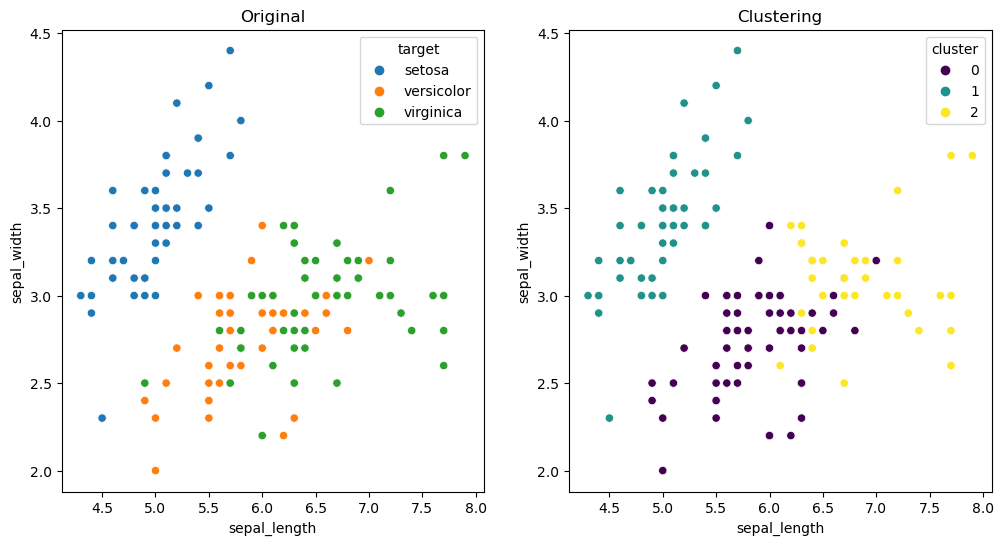

In [10]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.scatterplot(data = iris_df2, x = 'sepal_length', y = 'sepal_width', hue = 'target')
plt.title('Original')

plt.subplot(1,2,2)
sns.scatterplot(data = iris_df2, x = 'sepal_length', y = 'sepal_width', hue = 'cluster', palette= 'viridis')
plt.title('Clustering')
plt.show()

RFM 고객 세그멘테이션

In [14]:
retail_df = pd.read_excel('C:/Users/and_c/Desktop/sparta_python/ML/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [16]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
## 1. 데이터EDA 및 전처리 
retail_df.describe(include = 'all')

C:\Users\and_c\AppData\Local\Temp\ipykernel_27460\3587711246.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  retail_df.describe(include = 'all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [19]:
# 전처리 전략 1: customerID 결측치인것은 삭제 
cond_cust = (retail_df['CustomerID'].notnull())
retail_df[cond_cust].isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
# 전처리 전략2: Invoice가 C로 시작하는 행 삭제
cond_invo = (retail_df['InvoiceNo'].astype(str).str[0] != 'C')
retail_df[cond_invo].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [18]:
# 전처리 전략 3 : quantity가 음수이거나, unitprice가 음수이면 삭제
cond_minus = (retail_df['Quantity'] >0 ) & (retail_df['UnitPrice'] >0)
retail_df[cond_minus].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [21]:
retail_df_2 = retail_df[cond_cust & cond_invo & cond_minus]
retail_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [22]:
#나라별 카운트
retail_df_2['Country'].value_counts()[:10]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: Country, dtype: int64

In [24]:
# 데이터가 가장 많은 UK데이터만 따로 추출
cond_uk = (retail_df_2['Country'] =='United Kingdom')
retail_df_2 = retail_df_2[cond_uk]
retail_df_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [25]:
retail_df_2.describe(include= 'all')

C:\Users\and_c\AppData\Local\Temp\ipykernel_27460\3770014106.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  retail_df_2.describe(include= 'all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,354321.0,354321,354321,354321.000000,354321,354321.000000,354321.000000,354321
unique,16646.0,3645,3844,NaN,15612,NaN,NaN,1
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542.0,1947,1940,NaN,542,NaN,NaN,354321
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:49:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.013795,NaN,2.963994,15552.486392,NaN
std,NaN,NaN,NaN,189.267956,NaN,17.862655,1594.527150,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,14194.000000,NaN


In [27]:
# 매출 amt 열 만들기
retail_df_2['Amt'] = retail_df_2['Quantity'] * retail_df_2['UnitPrice']
retail_df_2['Amt'] = retail_df_2['Amt'].astype('int')

In [28]:
retail_df_2.pivot_table(index = 'CustomerID', values = 'Amt', aggfunc='sum').sort_values('Amt', ascending=False)

,Amt
CustomerID,
18102.0,259500
17450.0,194406
16446.0,168471
17511.0,90741
16029.0,80960
...,...
17956.0,12
16878.0,12
16454.0,6


In [29]:
import datetime as dt
# 2011.12.10일 기준으로 각 날짜를 빼고 + 1
# 추후 CustomerID 기준으로 Priod의 최소의 Priod를 구하면 그것이 Recency
# 1번사람 100일전, 20일전, 5일전


retail_df_2['Period'] = (dt.datetime(2011,12,10) - retail_df_2['InvoiceDate']).apply(lambda x: x.days+1)
retail_df_2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt,Period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22,374


In [30]:
rfm_df = retail_df_2.groupby('CustomerID').agg({
    'Period' : 'min',
    'InvoiceNo' : 'count',
    'Amt' : 'sum'
})
rfm_df

,Period,InvoiceNo,Amt
CustomerID,,,
12346.0,326,1,77183
12747.0,3,103,4143
12748.0,1,4595,31261
12749.0,4,199,3995
12820.0,4,59,916
...,...,...,...
18280.0,278,10,175
18281.0,181,7,78
18282.0,8,12,171


In [31]:
rfm_df.columns = ['Recency','Frequency','Monetary']

<AxesSubplot:xlabel='Recency', ylabel='Count'>

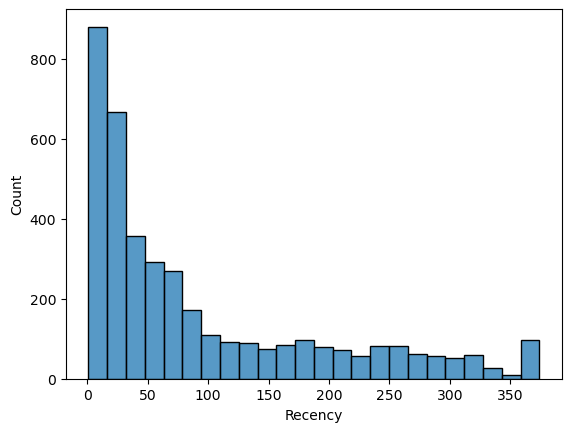

In [34]:
sns.histplot(rfm_df['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

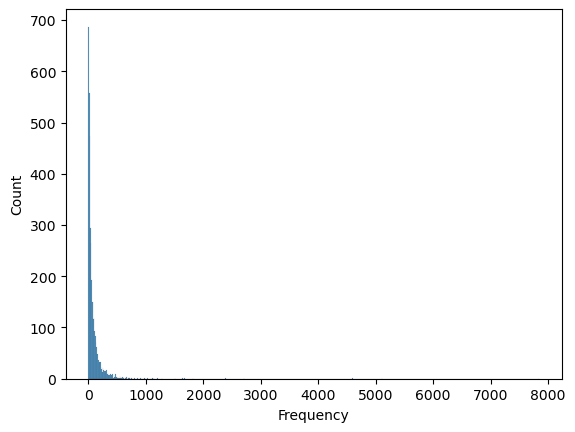

In [35]:
sns.histplot(rfm_df['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

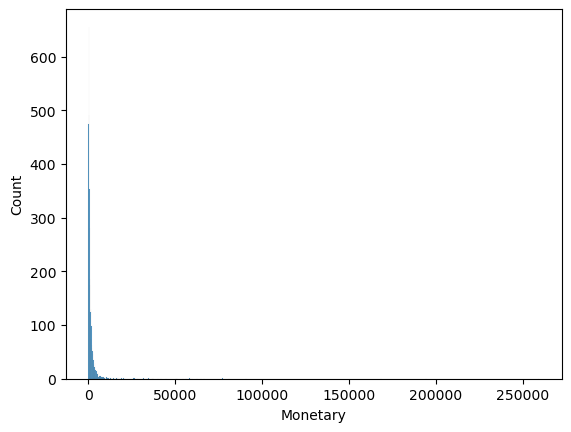

In [36]:
sns.histplot(rfm_df['Monetary'])

In [37]:
# 데이터정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_features = sc.fit_transform(rfm_df[['Recency','Frequency','Monetary']])


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 3, random_state = 42)
labels = kmeans.fit_predict(X_features)
rfm_df['label'] = labels

silhouette_score(X_features, labels)

0.5930190673437187

In [45]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 10), nrows=2, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        centers = clusterer.cluster_centers_
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[0,ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[0,ind].set_xlabel("The silhouette coefficient values")
        axs[0,ind].set_ylabel("Cluster label")
        axs[0,ind].set_xlim([-0.1, 1])
        axs[0,ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[0,ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[0,ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[0,ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[0,ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

            # 클러스터링된 데이터 시각화
            axs[1,ind].scatter(X_features[:, 0], X_features[:, 1], marker='.', s=30, lw=0, alpha=0.7, \
                c=cluster_labels)
            axs[1,ind].set_title("Clustered data")
            axs[1,ind].set_xlabel("Feature space for the 1st feature")
            axs[1,ind].set_ylabel("Feature space for the 2nd feature")  

        # 군집별 중심 위치 좌표 시각화 
        unique_labels = np.unique(cluster_labels)
        for label in unique_labels:
            center_x_y = centers[label]
            axs[1,ind].scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                        marker='$%d$' % label)
            
        axs[0,ind].axvline(x=sil_avg, color="red", linestyle="--")

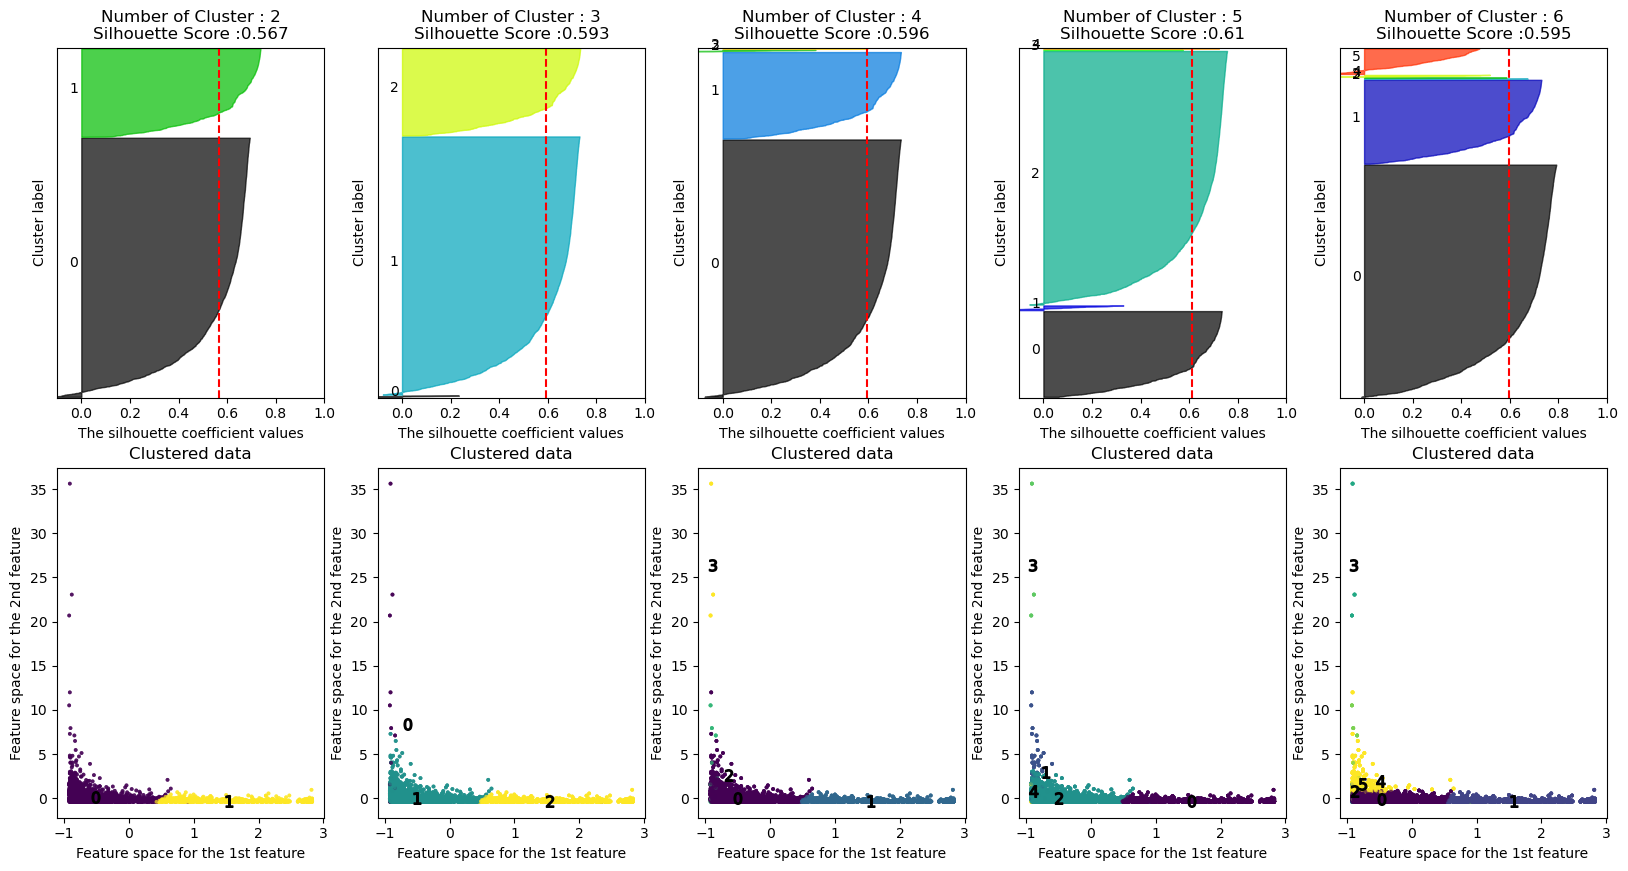

In [46]:
visualize_silhouette([2,3,4,5,6], X_features)

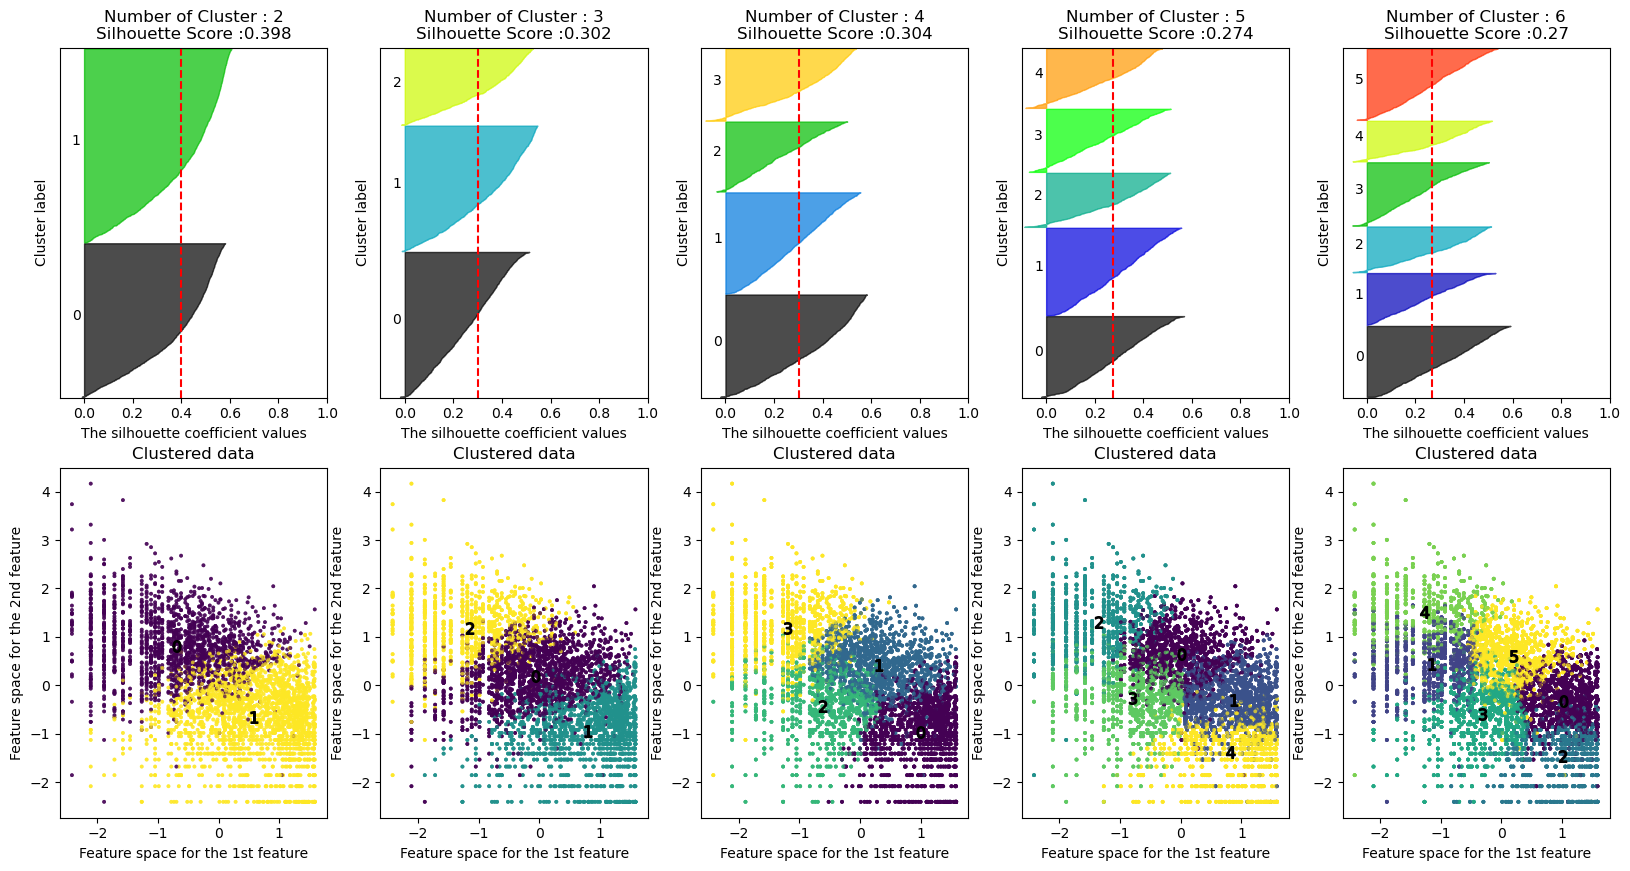

In [47]:
#log 스케일을 통한 추가전처리
import numpy as np

rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'])

X_features2 = rfm_df[['Recency_log','Frequency_log','Monetary_log']]
sc2 = StandardScaler()
X_features2_sc = sc2.fit_transform(X_features2)

visualize_silhouette([2,3,4,5,6], X_features2_sc)